#### Autoencoder Architecture

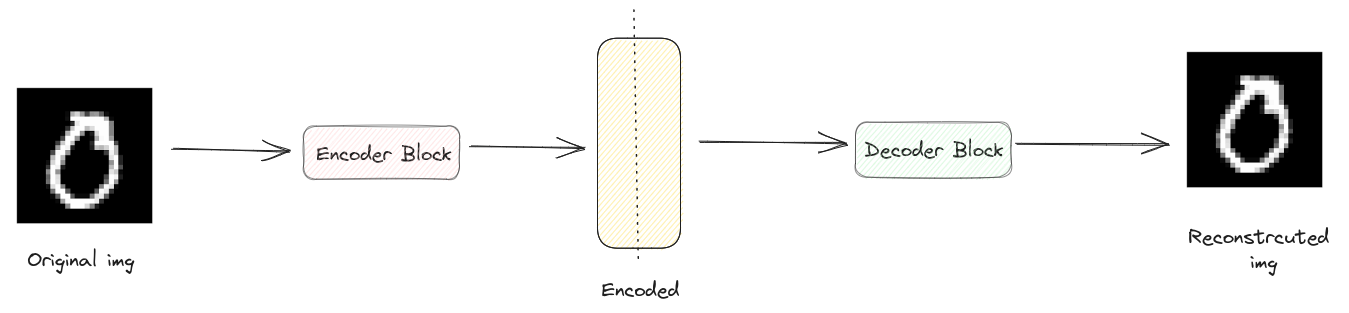

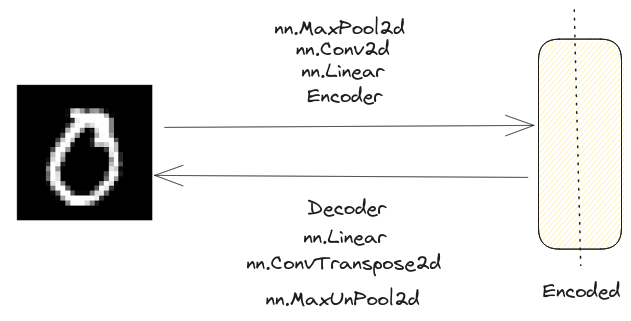

#### Import Modules

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

#### Dataset and DataLoader

In [ ]:
transform  = transforms.ToTensor()

mnist_data = datasets.MNIST(root="./data",train=True,download=True,transform=transform)
data_loader = torch.utils.data.DataLoader(
                                          dataset = mnist_data,
                                          batch_size=64,
                                          shuffle = True,
                                          )

100%|██████████| 9912422/9912422 [00:00<00:00, 79686799.81it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 16657823.68it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22365240.19it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4454180.21it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### Data Inspection

In [ ]:
dataiter = iter(data_loader)

for images,labels in dataiter:
  print(torch.min(images),torch.max(images))
  break

tensor(0.) tensor(1.)


#### Linaer Model

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    #N (batch_size),784 (28x28)
    self.encoder = nn.Sequential(
        nn.Linear(28*28,128), # N,784 -> N,128
        nn.ReLU(), # Activation function
        nn.Linear(128,64), # N, 128 -> N, 64
        nn.ReLU(), # Activation function
        nn.Linear(64, 12), # N, 64 -> N, 12
        nn.ReLU(), # Activation function
        nn.Linear(12, 3), # N, 12 -> N, 3
    ) # encode will drastically decrease the size of the image

    self.decoder = nn.Sequential(
        nn.Linear(3,12), # N, 3 -> N, 12
        nn.ReLU(),
        nn.Linear(12,64), # N, 12 -> N, 64
        nn.ReLU(),
        nn.Linear(64,128),  # N, 64 -> N, 128
        nn.ReLU(),
        nn.Linear(128,28*28),  # N, 128 -> N, 784
        nn.Sigmoid() # this is because the image pixel ranges from 0 to 1 if the values are -1 to 1 then use tanh
    )
    pass

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#### Parameters Declaring

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

#### Training Loop

In [ ]:
num_epochs = 10
output = []

for epoch in range(num_epochs):
  for (img, _) in data_loader:
    img = img.reshape(-1,28*28)
    recon = model(img)

    loss =criterion(recon,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch:{epoch+1}, Loss:{loss.item():.4f}")
  output.append((epoch,img,recon))



Epoch:1, Loss:0.0711
Epoch:2, Loss:0.0481
Epoch:3, Loss:0.0575
Epoch:4, Loss:0.0533
Epoch:5, Loss:0.0438
Epoch:6, Loss:0.0464
Epoch:7, Loss:0.0415
Epoch:8, Loss:0.0461
Epoch:9, Loss:0.0480
Epoch:10, Loss:0.0448


#### Plotting

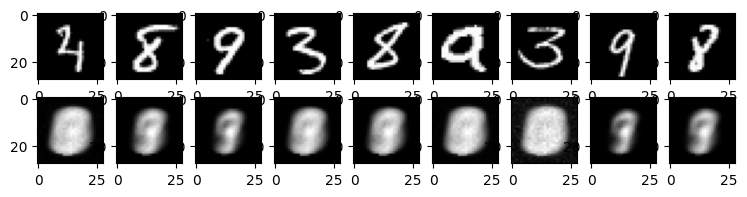

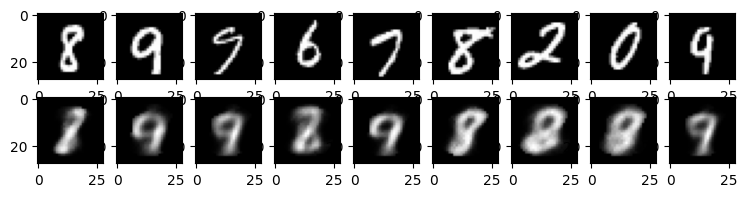

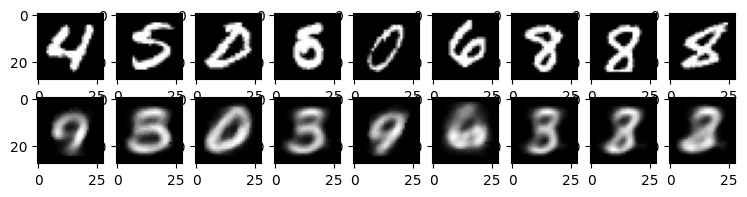

In [ ]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()

  img = output[k][1].detach().numpy()
  reconstructed = output[k][2].detach().numpy()
  for i,item in enumerate(img):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i,item in enumerate(reconstructed):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])


#### Using Convolutional Layers
Let's see how this

In [94]:
class Autoencoder_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    #N,1,28,28
    self.encoder = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1), # N, 16, 14, 14
        nn.ReLU(), # Activation function
        nn.Conv2d(16,32,kernel_size=3,stride=2,padding=1), # N, 32, 7, 7
        nn.ReLU(), # Activation function
        nn.Conv2d(32,64,kernel_size=7), #N, 64, 1, 1
    ) # encode will drastically decrease the size of the image

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64,32,kernel_size=7), # N, 32, 7, 7
        nn.ReLU(), # Activation function
        nn.ConvTranspose2d(32,16,kernel_size=3,stride=2,padding=1,output_padding=1), #N, 16, 14, 14
        nn.ReLU(), # Activation function
        nn.ConvTranspose2d(16,1,kernel_size=3,stride=2,padding=1,output_padding=1), #N, 1, 28, 28
        nn.Sigmoid(),
    ) # encode will drastically decrease the size of the image


  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#Note: [-1,1] -> nn.Tanh
#nn.MaxPool2d -> nn.MaxUnpool2d

#### Parameters Declaring

In [95]:
model = Autoencoder_CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

#### Training Loop

In [98]:
#Training loop
num_epochs = 10
output= [ ]

for epoch in range(num_epochs):
  for (img,_) in data_loader:
    recon = model(img)
    loss = criterion(recon,img)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  output.append((epoch,img,recon))

Epoch:1, Loss:0.0597
Epoch:2, Loss:0.0233
Epoch:3, Loss:0.0157
Epoch:4, Loss:0.0113
Epoch:5, Loss:0.0097
Epoch:6, Loss:0.0095
Epoch:7, Loss:0.0070
Epoch:8, Loss:0.0065
Epoch:9, Loss:0.0058
Epoch:10, Loss:0.0050


#### Plotting

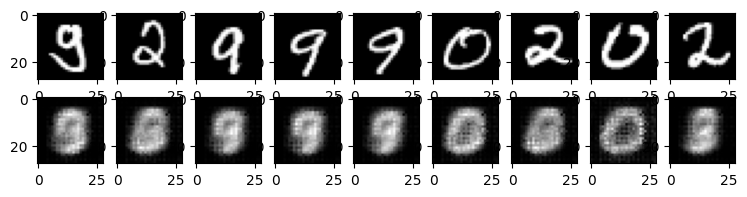

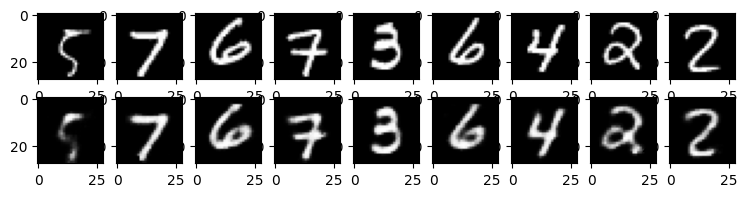

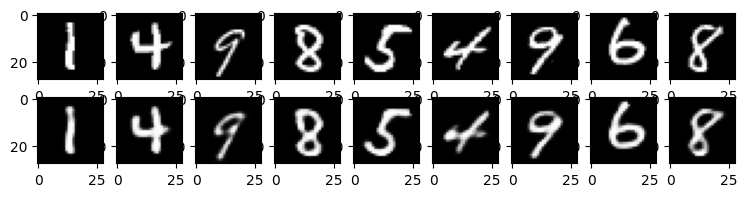

In [99]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()

  img = output[k][1].detach().numpy()
  reconstructed = output[k][2].detach().numpy()
  for i,item in enumerate(img):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i,item in enumerate(reconstructed):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])


So our CNN is better than Linear layers

#### Rough Work

IndexError: ignored

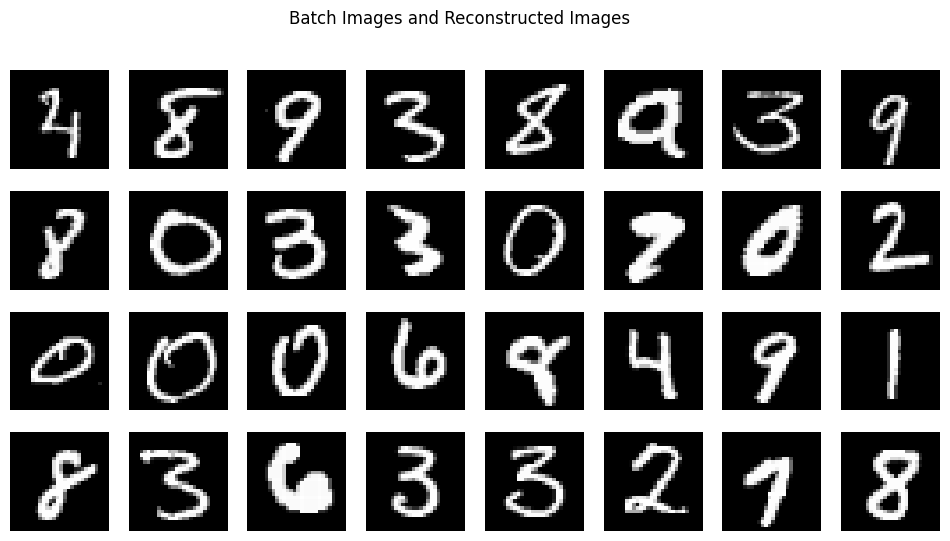

In [ ]:
for epoch, image, reconstructed_image in output:
    # Convert tensors to NumPy arrays and reshape them
    image_np = image.reshape(32, 28, 28)  # Assuming MNIST-like images (32, 28*28)
    reconstructed_np = reconstructed_image.detach().numpy().reshape(32, 28, 28)

    # Plot the original image and the reconstructed image side by side
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    fig.suptitle('Batch Images and Reconstructed Images')

    # Iterate over each image in the batch and plot them
    for i in range(4):
        for j in range(8):
            axes[i, j].imshow(image_np[i * 8 + j], cmap='gray')
            axes[i, j].axis('off')

    # Plot the reconstructed images
    for i in range(4):
        for j in range(8):
            axes[i, j + 8].imshow(reconstructed_np[i * 8 + j], cmap='gray')
            axes[i, j + 8].axis('off')

    plt.tight_layout()
    plt.show()

In [70]:
conv = nn.Conv2d(32,64,kernel_size=7)
input = torch.randn((1,32,7,7))

In [71]:
output = conv(input)
output.shape

torch.Size([1, 64, 1, 1])

In [92]:
upconv = nn.ConvTranspose2d(32,16,3,2,1,1)
input = torch.randn((1, 32, 7, 7))

In [93]:
upconv(input).shape

torch.Size([1, 16, 14, 14])